In [27]:
import import_ipynb
import datetime
import pandas
from IPython.display import display
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import dates as mdate
from sklearn.linear_model import LinearRegression

In [28]:
# CONSTANTS

MOISTURES_PROBES = ['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX6','MUX7']
ROLLING_WINDOW = 30 # RUPTURE_LEVEL_THRESHOLD and PCT_CHANGE_PERIOD are affected by this value
RUPTURE_LEVEL_THRESHOLD = 0.015
PCT_CHANGE_PERIOD = 10 # RUPTURE_LEVEL_THRESHOLD is affected by this value 

# UTILS

def plot(series): 
    plt.rcParams['figure.figsize'] = [15,7]
    plt.rcParams['timezone'] = 'America/Sao_Paulo'

    fig,ax = plt.subplots()
    x = mdate.epoch2num(series.index)
    fmt = mdate.DateFormatter('%y-%m-%d %H:%M')

    ax.xaxis.set_major_formatter(fmt)
    plt.xticks( rotation=25 )
    plt.plot_date(x, series, linestyle='solid', marker='None')
    plt.legend(MOISTURES_PROBES)
    plt.show()

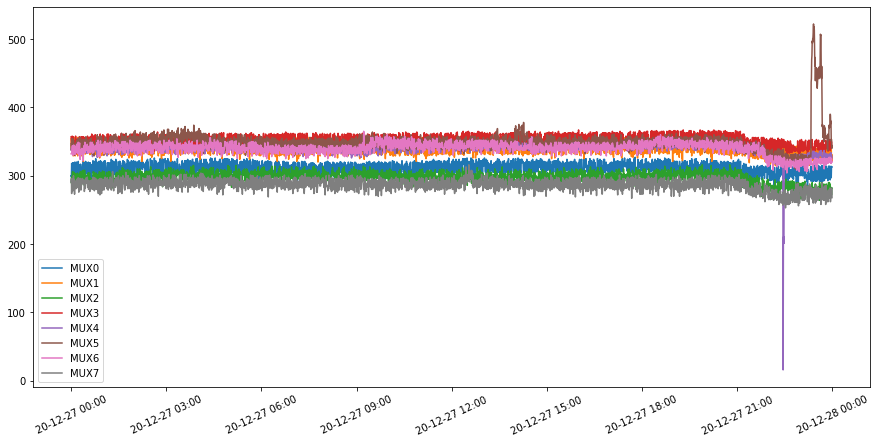

In [29]:
# RAW DATA: Start time: 2020-12-27 00:00:00   End time: 2020-12-27 23:59:59
df = pandas.read_pickle('./20201227_linear_regression_after_rupture_dataset.pkl')
plot(df)

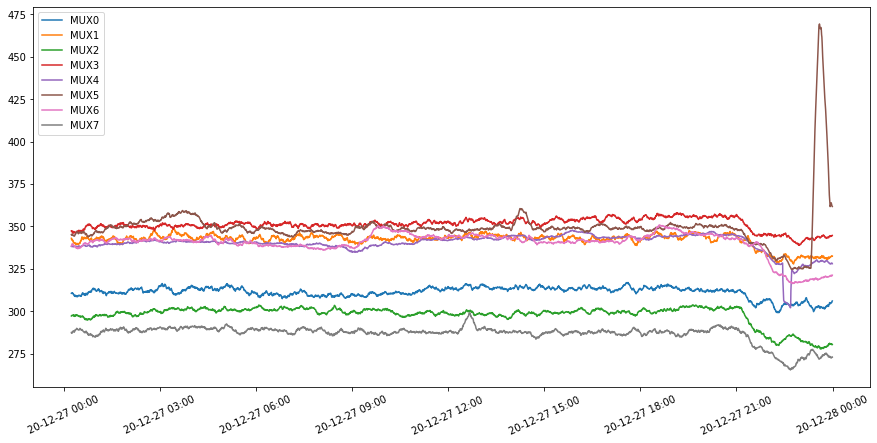

In [30]:
# Filtering the noise ...
dfr = df.rolling(ROLLING_WINDOW).mean().dropna()
plot(dfr)

In [31]:
dfr

,MUX0,MUX1,MUX2,MUX3,MUX4,MUX5,MUX6,MUX7
TIMESTAMP,,,,,,,,
1609038871,310.533333,342.933333,297.166667,347.300000,338.166667,345.066667,338.466667,287.366667
1609038901,310.700000,342.133333,297.366667,346.800000,338.300000,345.200000,338.733333,287.333333
1609038931,310.800000,342.433333,297.433333,347.000000,338.266667,345.000000,339.166667,286.933333
1609038961,310.733333,341.966667,297.600000,347.166667,338.200000,345.433333,339.666667,287.666667
1609038991,310.400000,341.966667,297.600000,347.233333,338.166667,344.966667,339.800000,287.500000
...,...,...,...,...,...,...,...,...
1609124252,304.933333,332.333333,280.766667,344.233333,328.300000,363.866667,321.066667,272.366667
1609124282,305.066667,332.300000,280.800000,344.100000,328.266667,363.166667,320.833333,272.500000
1609124312,305.066667,332.266667,280.366667,344.566667,328.366667,362.600000,321.000000,272.866667


In [34]:
X = dfr.index.to_numpy().reshape(-1, 1) 

i=0
#dd=dd.reset_index()

for mux in MOISTURES_PROBES:

    Y = dfr.iloc[:, i].values.reshape(-1, 1) 
    # display

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    print("[MUX",i-1,"] >> SCORE:", linear_regressor.score(X,Y),
          " ALPHA:", linear_regressor.coef_[0][0])
    #plt.scatter(X, Y)
    #plt.plot(X, Y_pred, color='red')
    #plt.show()
    i=i+1

[MUX -1 ] >> SCORE: 0.08011934123924436  ALPHA: -3.730836743563232e-05
[MUX 0 ] >> SCORE: 0.18215934289021163  ALPHA: -6.616664433538847e-05
[MUX 1 ] >> SCORE: 0.21775615848410856  ALPHA: -0.00010522574300345804
[MUX 2 ] >> SCORE: 0.0003712283434740282  ALPHA: 2.7188746275246042e-06
[MUX 3 ] >> SCORE: 0.025155644078724948  ALPHA: -3.7032727373722655e-05
[MUX 4 ] >> SCORE: 0.0012533835261413495  ALPHA: 1.9665363118194478e-05
[MUX 5 ] >> SCORE: 0.10187098088639845  ALPHA: -8.985792456506306e-05
[MUX 6 ] >> SCORE: 0.304986942628397  ALPHA: -0.00011368161399244255


In [37]:
def linear_regressor(data):
    X = data.index.to_numpy().reshape(-1, 1)
    entries={}
    for mux in MOISTURES_PROBES:
        Y = data[mux].values.reshape(-1, 1)
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        entry={}
        entry['score']=linear_regressor.score(X,Y)
        entry['coef'] =linear_regressor.coef_[0][0]
        entries[mux] = entry
    return pandas.DataFrame(data=entries).T # transpose
linear_regressor(dfr)

,score,coef
MUX0,0.080119,-0.000037
MUX1,0.182159,-0.000066
MUX2,0.217756,-0.000105
MUX3,0.000371,0.000003
MUX4,0.025156,-0.000037
MUX5,0.001253,0.000020
MUX6,0.101871,-0.000090
MUX7,0.304987,-0.000114
